In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [16]:
# Constants
DATA_PATH = "data/raw/data.csv"
OUTPUT_PATH = "output/figures/"
CLEAN_DATA_PATH = "data/processed/data.csv"

# DATA COLLECTION
Data based on https://www.kaggle.com/imnikhilanand/heart-attack-prediction dataset

In [5]:
data = pd.read_csv(DATA_PATH)

# DATA EXPLORATION
Small analisys of the dataset

In [6]:
data.shape

(294, 14)

We have 294 rows of data with 14 columns...let see the labels

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

## Attribute Information
 - Age (age in years)
 - Sex (1 = male; 0 = female)
 - CP (chest pain type)
 - TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
 - CHOL (serum cholestoral in mg/dl)
 - FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - RESTECH (resting electrocardiographic results)
 - THALACH (maximum heart rate achieved)
 - EXANG (exercise induced angina (1 = yes; 0 = no))
 - OLDPEAK (ST depression induced by exercise relative to rest)
 - SLOPE (the slope of the peak exercise ST segment)
 - CA (number of major vessels (0-3) colored by flourosopy)
 - THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
 - TARGET (1 or 0)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [12]:
data.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [13]:
def check_unique(df):
    """"
    Checks the unique value in each column
    :param df: The dataframe
    """
    for col in df.columns:
        unique = df[col].unique()
        print("Column: {} has {} unique values\n".format(col, unique))

In [14]:
check_unique(data)

Column: age has [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66] unique values

Column: sex has [1 0] unique values

Column: cp has [2 1 3 4] unique values

Column: trestbps has ['130' '120' '140' '170' '100' '105' '110' '125' '150' '98' '112' '145'
 '190' '160' '115' '142' '180' '132' '135' '?' '108' '124' '113' '122'
 '92' '118' '106' '200' '138' '136' '128' '155'] unique values

Column: chol has ['132' '243' '?' '237' '219' '198' '225' '254' '298' '161' '214' '220'
 '160' '167' '308' '264' '166' '340' '209' '260' '211' '173' '283' '194'
 '223' '315' '275' '297' '292' '182' '200' '204' '241' '339' '147' '273'
 '307' '289' '215' '281' '250' '184' '245' '291' '295' '269' '196' '268'
 '228' '358' '201' '249' '266' '186' '207' '218' '412' '224' '238' '230'
 '163' '240' '280' '257' '263' '276' '284' '195' '227' '253' '187' '202'
 '328' '168' '216' '129' '190' '188' '179' '210' '272' '180' '100' '259'
 '468' '274' '320' '2

In [15]:
data['num       '].value_counts()

0    188
1    106
Name: num       , dtype: int64

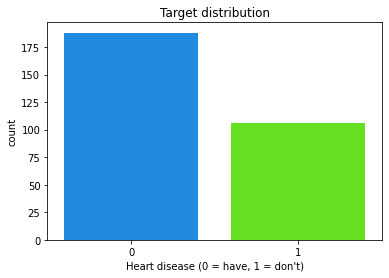

In [18]:
fig = plt.figure()
sns.countplot(x="num       ", data=data, palette="gist_rainbow_r")
plt.xlabel("Heart disease (0 = have, 1 = don't)")
plt.title("Target distribution")
plt.show()
fig.savefig(OUTPUT_PATH+"targetdist.png", )

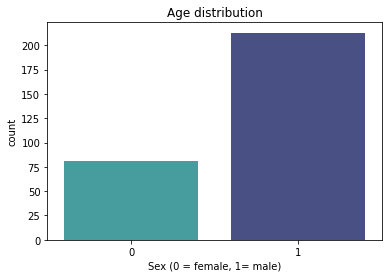

In [21]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.title("Age distribution")
plt.savefig(OUTPUT_PATH+"agedist.png", format="png")

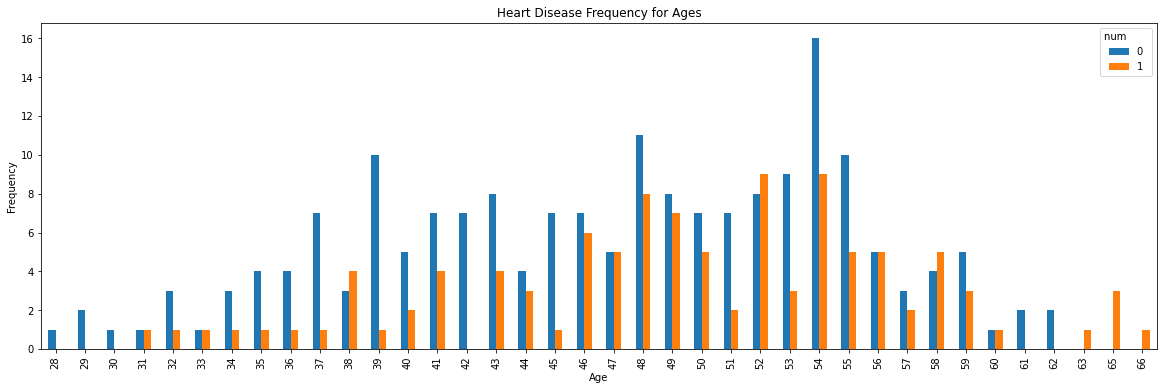

In [23]:
pd.crosstab(data['age'], data['num       ']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig(OUTPUT_PATH+"heartDiseaseAndAges.png")

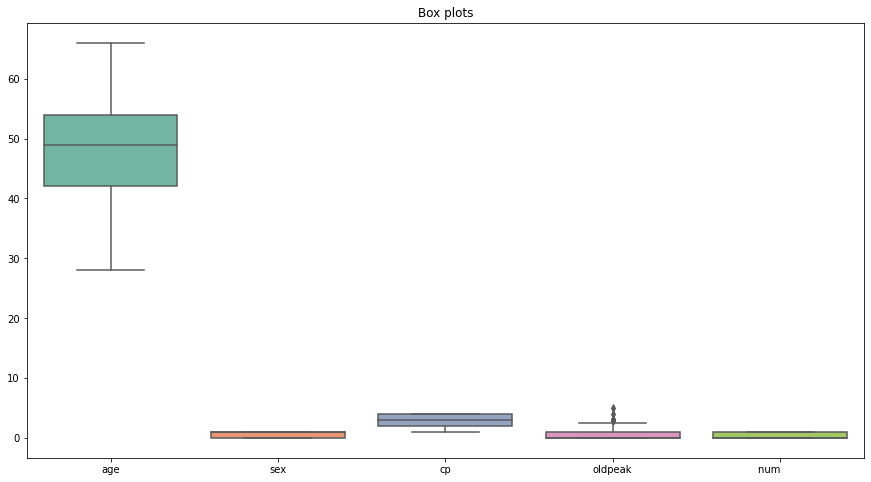

In [24]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box plots")
plt.savefig(OUTPUT_PATH+"boxplot.png")

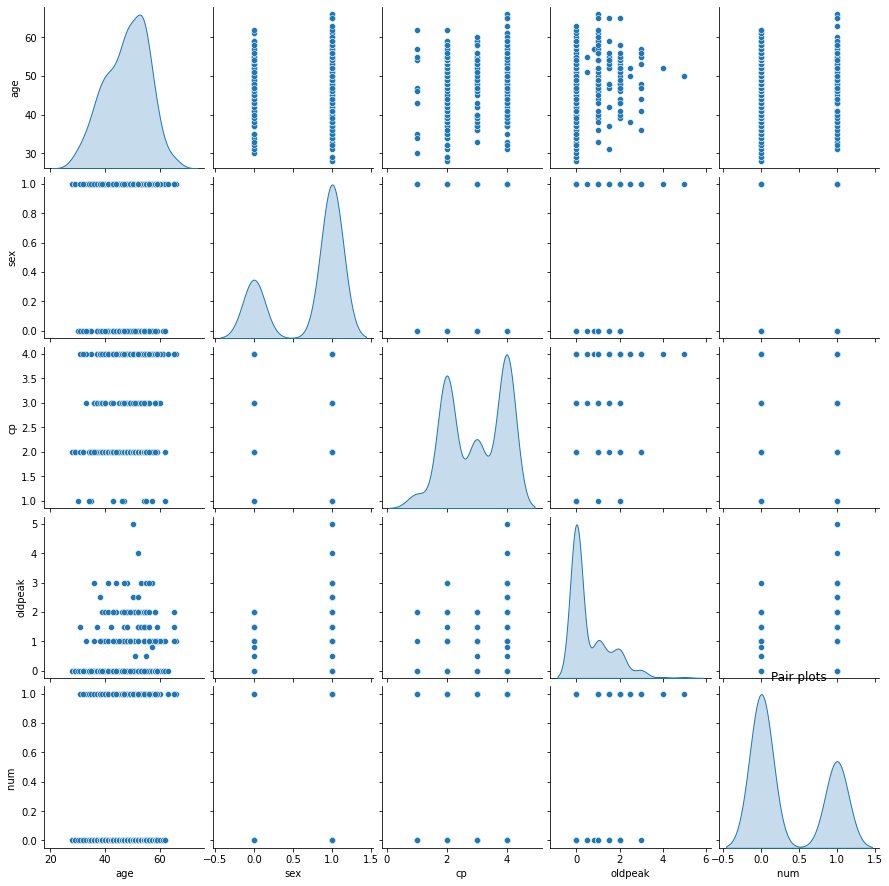

In [25]:
sns.pairplot(data, diag_kind="kde")
plt.title("Pair plots")
plt.savefig(OUTPUT_PATH+"pairplot.png")